In [1]:
import torch
torch.__version__

'2.0.1+cu118'

**Introduction to tensors**

Tensors are fundamental buolding blocks in Machine Learning and their job is to represent data in numerical way. We can represent an image in tensor ```[colour_channel, height, width]``` Here we have 3D tensor

First, we'll create scalar, which is a 0D tensor

In [3]:
#Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

although scalar is a number, it is a ```tensor.tensor```

checking tensor dim with ```ndim```

In [5]:
scalar.ndim

0

What if we want to retrive the number?

In [7]:
# use item() attribute
scalar.item()

7

**Let's move on to vectors**

In [9]:
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [10]:
vector.ndim

1

that's strange 1D? why? Balony! haha

There's a trick through which we can determine the dim of tensors in pytorch.

You can tell the number of dimensions a tensor in PyTorch has by the number of square brackets on the outside ```([)``` and you only need to count one side.

Another important concept is ```shape``` attribute. The shape tells how the elements inside them are arranged.

In [11]:
vector.shape

torch.Size([2])

The above returns ```torch.Size([2])``` which means our vector has a shape of [2]. This is because of the two elements we placed inside the square brackets ([7, 7]).

Let's now see matrix

In [14]:
MATRIX = torch.tensor([[7,8],
                       [9, 10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [15]:
MATRIX.ndim

2

In [16]:
MATRIX.shape

torch.Size([2, 2])


We get the output ```torch.Size([2, 2])``` because MATRIX is two elements deep and two elements wide.

Let's create a **tensor**

In [18]:
# Tensor
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

Tensor can be anything. Not just random numbers


In [19]:
# Check number of dimensions for TENSOR
TENSOR.ndim

3

In [20]:
# Check shape of TENSOR
TENSOR.shape

torch.Size([1, 3, 3])


Alright, it outputs ```torch.Size([1, 3, 3])```.

The dimensions go outer to inner.

That means there's 1 dimension of 3 by 3.

**Note:** You might've noticed me using lowercase letters for scalar and vector and uppercase letters for MATRIX and TENSOR. This was on purpose. In practice, you'll often see scalars and vectors denoted as lowercase letters such as y or a. And matrices and tensors denoted as uppercase letters such as X or W.

You also might notice the names martrix and tensor used interchangably. This is common. Since in PyTorch you're often dealing with torch.Tensors (hence the tensor name), however, the shape and dimensions of what's inside will dictate what it actually is.

**random numbers/tensors**
To do this we'll use ```torch.rand()`` function

In [23]:
random_tensors = torch.rand(size=(3,4))
random_tensors, random_tensors.dtype

(tensor([[0.8173, 0.9580, 0.7967, 0.7441],
         [0.8998, 0.1058, 0.4690, 0.5900],
         [0.5560, 0.5251, 0.3669, 0.8742]]),
 torch.float32)

In [24]:
# Create a random tensor of size (224, 224, 3)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

**Zeros and ones**

Sometimes while working with masking models, mostly in NLP, you want to mask your data with zeors or ones so you model don't learn them or it can be for fixing the length/interporlation

we use ```torch.zeros()```

In [25]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

for ones ```torch.ones()```

In [26]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones, ones.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

**Creating a range and tensors alike**

Sometimes you might want a range of numbers, such as 1 to 10 or 0 to 100.

You can use ```torch.arange(start, end, step)``` to do so.

Where:

start = start of range (e.g. 0)
end = end of range (e.g. 10)
step = how many steps in between each value (e.g. 1)

In [27]:
# Use torch.arange(), torch.range() is deprecated
zero_to_ten_deprecated = torch.range(0, 10) # Note: this may return an error in the future

# Create a range of values 0 to 10
zero_to_ten = torch.arange(start=0, end=10, step=1)
zero_to_ten

<ipython-input-27-a09072c806d9>:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  zero_to_ten_deprecated = torch.range(0, 10) # Note: this may return an error in the future


tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**Tensor datatypes**

The most common type (and generally the default) is ```torch.float32``` or ```torch.float```

The higher the precision value (8, 16, 32), the more detail and hence data used to express a number.

This matters in deep learning and numerical computing because you're making so many operations, the more detail you have to calculate on, the more compute you have to use.

So lower precision datatypes are generally faster to compute on but sacrifice some performance on evaluation metrics like accuracy (faster to compute but less accurate).

In [28]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

while writing code in pytorch make sure, your tensors are in the same datatype, with whom on you're trying to perform operations

Another point, one tensor on cpu and another gpu will cause an error as pytorch loves them to be in the same device

In [29]:
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16) # torch.half would also work

float_16_tensor.dtype

torch.float16

What are the basic information to investigate while facing an error?

In [30]:
# Create a tensor
some_tensor = torch.rand(3, 4)

# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

tensor([[0.0269, 0.2588, 0.9257, 0.7936],
        [0.4726, 0.5256, 0.2050, 0.9890],
        [0.2353, 0.0555, 0.5098, 0.0792]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


**Manipulating Tensors (Basic Maths operations on them)**

In [31]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [32]:
# Multiply it by 10
tensor * 10

tensor([10, 20, 30])


Notice how the tensor values above didn't end up being ```tensor([110, 120, 130])```, this is because the values inside the tensor don't change unless they're reassigned.

In [33]:
# Tensors don't change unless reassigned
tensor

tensor([1, 2, 3])

In [34]:
# Subtract and reassign
tensor = tensor - 10
tensor

tensor([-9, -8, -7])

In [35]:
# Add and reassign
tensor = tensor + 10
tensor

tensor([1, 2, 3])


PyTorch also has a bunch of built-in functions like `torch.mul()` (short for multiplication) and `torch.add()` to perform basic operations.

In [36]:
# Can also use torch functions
torch.multiply(tensor, 10)

tensor([10, 20, 30])

In [37]:
torch.mul(tensor, 10)

tensor([10, 20, 30])

In [38]:
# Original tensor is still unchanged
tensor

tensor([1, 2, 3])


However, it's more common to use the operator symbols like `*` instead of `torch.mul()`

In [40]:
# Element-wise multiplication (each element multiplies its equivalent, index 0->0, 1->1, 2->2)
print(tensor, "*", tensor)
print("Equals:", tensor * tensor)

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


**Matrix Multiplication (all you need in Deep Learning)**

We perform this interesting operation using `torch.matmul()`

The main two rules for matrix multiplication to remember are:

The inner dimensions must match:
1. `(3, 2) @ (3, 2) won't work`
2. `(2, 3) @ (3, 2) will work`
3.`(3, 2) @ (2, 3) will work`
The resulting matrix has the shape of the outer dimensions:
1. `(2, 3) @ (3, 2) -> (2, 2)`
2. `(3, 2) @ (2, 3) -> (3, 3)`

**Note:** `"@"`in Python is the symbol for matrix multiplication.

In [ ]:
tensor = torch.tensor([1, 2, 3])
tensor.shape

1. `Element-wise multiplication	[1*1, 2*2, 3*3] = [1, 4, 9]`
2. `Matrix multiplication	[1*1 + 2*2 + 3*3] = [14]`

In [41]:
# Element-wise matrix multiplication
tensor * tensor

tensor([1, 4, 9])

In [42]:
# Matrix multiplication
torch.matmul(tensor, tensor)

tensor(14)

In [43]:
# Can also use the "@" symbol for matrix multiplication, though not recommended
tensor @ tensor

tensor(14)

*doing matrix multiplication by hand*

In [44]:
%%time
# Matrix multiplication by hand
# (avoid doing operations with for loops at all cost, they are computationally expensive)
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
value

CPU times: user 1.47 ms, sys: 46 µs, total: 1.52 ms
Wall time: 1.4 ms


tensor(14)

In [45]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 117 µs, sys: 0 ns, total: 117 µs
Wall time: 121 µs


tensor(14)

#### **One of the most common errors in deep learning (shape errors)**

We finally need headings, yay!


Because much of deep learning is multiplying and performing operations on matrices and matrices have a strict rule about what shapes and sizes can be combined, one of the most common errors you'll run into in deep learning is shape mismatches.

In [46]:
# Shapes need to be in the right way
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B) # (this will error)

RuntimeError: ignored

We can make matrix multiplication work between tensor_A and tensor_B by making their inner dimensions match.

One of the ways to do this is with a transpose (switch the dimensions of a given tensor).

**We can perform transposes in PyTorch using either:**

* torch.transpose(input, dim0, dim1) - where input is the desired tensor to transpose and dim0 and dim1 are the dimensions to be swapped.
* tensor.T - where tensor is the desired tensor to transpose.

In [47]:
# View tensor_A and tensor_B
print(tensor_A)
print(tensor_B)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7., 10.],
        [ 8., 11.],
        [ 9., 12.]])


In [48]:
# View tensor_A and tensor_B.T
print(tensor_A)
print(tensor_B.T)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])


In [49]:
# The operation works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n")
print(f"Multiplying: {tensor_A.shape} * {tensor_B.T.shape} <- inner dimensions match\n")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])

New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Multiplying: torch.Size([3, 2]) * torch.Size([2, 3]) <- inner dimensions match

Output:

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

Output shape: torch.Size([3, 3])


In [50]:
# torch.mm is a shortcut for matmul
torch.mm(tensor_A, tensor_B.T)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

a small visual...

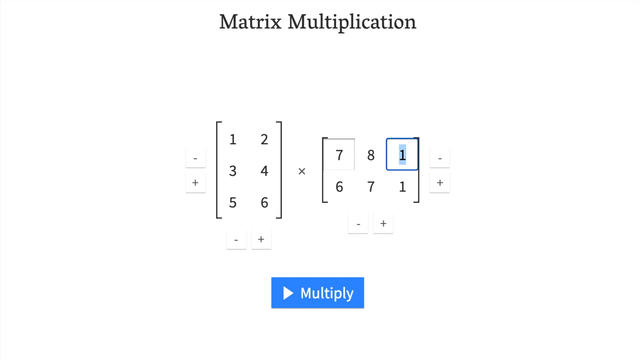

matrix multiplication is same as dot product of matrices


Neural networks are full of matrix multiplications and dot products.

The `torch.nn.Linear()` module (we'll see this in action later on), also known as a feed-forward layer or fully connected layer, implements a matrix multiplication between an input `x` and a weights matrix `A`.

$$
y = x \cdot A^T + b
$$


Where:

* x is the input to the layer (deep learning is a stack of layers like torch.nn.Linear() and others on top of each other).
* `A` is the weights matrix created by the layer, this starts out as random numbers that get adjusted as a neural network learns to better represent patterns in the data (notice the "T", that's because the weights matrix gets transposed).
**Note:** You might also often see W or another letter like X used to showcase the weights matrix.
* `b` is the bias term used to slightly offset the weights and inputs.
* `y` is the output (a manipulation of the input in the hopes to discover patterns in it).
This is a linear function (you may have seen something like
**y=mx+b** in high school or elsewhere), and can be used to draw a straight line!

In [51]:
# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(in_features=2, # in_features = matches inner dimension of input
                         out_features=6) # out_features = describes outer value
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


**Finding the min, max, mean, sum, etc (aggregation)**

Now we've seen a few ways to manipulate tensors, let's run through a few ways to aggregate them (go from more values to less values).

First we'll create a tensor and then find the max, min, mean and sum of it.

In [52]:
# Create a tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [53]:
print(f"Minimum: {x.min()}")
print(f"Maximum: {x.max()}")
# print(f"Mean: {x.mean()}") # this will error
print(f"Mean: {x.type(torch.float32).mean()}") # won't work without float datatype
print(f"Sum: {x.sum()}")

Minimum: 0
Maximum: 90
Mean: 45.0
Sum: 450


same operations but with `torch`

In [54]:
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(90), tensor(0), tensor(45.), tensor(450))

**Positional min/max**

You can also find the index of a tensor where the max or minimum occurs with `torch.argmax()` and `torch.argmin()` respectively.

This is helpful incase you just want the position where the highest (or lowest) value is and not the actual value itself (we'll see this in a later section when using the softmax activation function).

In [55]:
# Create a tensor
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# Returns index of max and min values
print(f"Index where max value occurs: {tensor.argmax()}")
print(f"Index where min value occurs: {tensor.argmin()}")

Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
Index where max value occurs: 8
Index where min value occurs: 0


**Change tensor datatype**

As mentioned, a common issue with deep learning operations is having your tensors in different datatypes.

If one tensor is in `torch.float64` and another is in `torch.float32`, you might run into some errors.

But there's a fix.

You can change the datatypes of tensors using `torch.Tensor.type(dtype=None)`where the dtype parameter is the datatype you'd like to use.

In [56]:
# Create a tensor and check its datatype
tensor = torch.arange(10., 100., 10.)
tensor.dtype

torch.float32

In [57]:
# Create a float16 tensor
tensor_float16 = tensor.type(torch.float16)
tensor_float16

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)

In [58]:
# Create a int8 tensor
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

**Reshaping, stacking, squeezing and unsqueezing**

Often times you'll want to reshape or change the dimensions of your tensors without actually changing the values inside them.

<table border="1">
  <tr>
    <th>Function</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>torch.reshape(input, shape)</td>
    <td>Reshapes input to shape (if compatible), can also use torch.Tensor.reshape().</td>
  </tr>
  <tr>
    <td>torch.Tensor.view(shape)</td>
    <td>Returns a view of the original tensor in a different shape but shares the same data as the original tensor.</td>
  </tr>
  <tr>
    <td>torch.stack(tensors, dim=0)</td>
    <td>Concatenates a sequence of tensors along a new dimension (dim), all tensors must be the same size.</td>
  </tr>
  <tr>
    <td>torch.squeeze(input)</td>
    <td>Squeezes input to remove all the dimensions with value 1.</td>
  </tr>
  <tr>
    <td>torch.unsqueeze(input, dim)</td>
    <td>Returns input with a dimension value of 1 added at dim.</td>
  </tr>
  <tr>
    <td>torch.permute(input, dims)</td>
    <td>Returns a view of the original input with its dimensions permuted (rearranged) to dims.</td>
  </tr>
</table>


Why do any of these?

Because deep learning models (neural networks) are all about manipulating tensors in some way. And because of the rules of matrix multiplication, if you've got shape mismatches, you'll run into errors. These methods help you make the right elements of your tensors are mixing with the right elements of other tensors.

Let's try them out.

In [59]:
x = torch.arange(1., 8.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]))

In [60]:
# Add an extra dimension
x_reshaped = x.reshape(1, 7)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [61]:
# Change view (keeps same data as original but changes view)
# See more: https://stackoverflow.com/a/54507446/7900723
z = x.view(1, 7)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))


Remember though, changing the view of a tensor with `torch.view()` really only creates a new view of the same tensor.

So changing the view changes the original tensor too.

In [64]:
# Changing z changes x
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7.]]), tensor([5., 2., 3., 4., 5., 6., 7.]))

If we wanted to stack our new tensor on top of itself five times, we could do so with torch.stack().

In [74]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim=1) # try changing dim to dim=1 and see what happens
x_stacked

tensor([[5., 5., 5., 5.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.]])

In [75]:
x_stacked.shape

torch.Size([7, 4])

In [76]:
x_stacked.ndim

2


How about removing all single dimensions from a tensor?

To do so you can use `torch.squeeze()` (I remember this as squeezing the tensor to only have dimensions over 1).

In [77]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])


And to do the reverse of `torch.squeeze()` you can use torch.unsqueeze() to add a dimension value of 1 at a specific index.

In [80]:
print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])



You can also rearrange the order of axes values with `torch.permute(input, dims)`, where the input gets turned into a view with new dims.

In [82]:
# Create tensor with specific shape
x_original = torch.rand(size=(224, 224, 3))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


**Indexing (selecting data from tensors)**

Sometimes you'll want to select specific data from tensors (for example, only the first column or second row).

To do so, you can use indexing.

If you've ever done indexing on Python lists or NumPy arrays, indexing in PyTorch with tensors is very similar.

In [83]:
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

Indexing values goes outer dimension -> inner dimension (check out the square brackets).

In [84]:
# Let's index bracket by bracket
print(f"First square bracket:\n{x[0]}")
print(f"Second square bracket: {x[0][0]}")
print(f"Third square bracket: {x[0][0][0]}")

First square bracket:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


You can also use : to specify "all values in this dimension" and then use a comma (,) to add another dimension.

In [85]:
# Get all values of 0th dimension and the 0 index of 1st dimension
x[:, 0]

tensor([[1, 2, 3]])

In [86]:
# Get all values of 0th & 1st dimensions but only index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [87]:
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
x[:, 1, 1]

tensor([5])

In [88]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension
x[0, 0, :] # same as x[0][0]

tensor([1, 2, 3])

Indexing can be quite confusing to begin with, especially with larger tensors (I still have to try indexing multiple times to get it right). But with a bit of practice and following the data explorer's motto (**visualize, visualize, visualize**), you'll start to get the hang of it.

**PyTorch tensors & NumPy**

Since NumPy is a popular Python numerical computing library, PyTorch has functionality to interact with it nicely.

The two main methods you'll want to use for NumPy to PyTorch (and back again) are:

1. torch.from_numpy(ndarray) - NumPy array -> PyTorch tensor.
2. torch.Tensor.numpy() - PyTorch tensor -> NumPy array.

In [89]:
import numpy as np
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [90]:
# Change the array, keep the tensor
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [92]:
# Tensor to NumPy array
tensor = torch.ones(7) # create a tensor of ones with dtype=float32
numpy_tensor = tensor.numpy() # will be dtype=float32 unless changed
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [93]:
# Change the tensor, keep the array the same
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

**Reproducibility (trying to take the random out of random)**

`start with random numbers -> tensor operations -> try to make better (again and again and again)`

In [94]:
# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(f"Tensor A:\n{random_tensor_A}\n")
print(f"Tensor B:\n{random_tensor_B}\n")
print(f"Does Tensor A equal Tensor B? (anywhere)")
random_tensor_A == random_tensor_B

Tensor A:
tensor([[0.8660, 0.2001, 0.7926, 0.1140],
        [0.6855, 0.0086, 0.3588, 0.9211],
        [0.8627, 0.8223, 0.5248, 0.5881]])

Tensor B:
tensor([[0.2746, 0.3791, 0.2975, 0.6450],
        [0.0163, 0.9160, 0.5888, 0.8403],
        [0.4761, 0.7140, 0.4644, 0.6362]])

Does Tensor A equal Tensor B? (anywhere)


tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

As in, the tensors would still contain random values but they would be of the same flavour.

That's where `torch.manual_seed(seed)` comes in, where seed is an integer (like 42 but it could be anything) that flavours the randomness.

In [95]:
import random

# # Set the random seed
RANDOM_SEED=42 # try changing this to different values and see what happens to the numbers below
torch.manual_seed(seed=RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

# Have to reset the seed every time a new rand() is called
# Without this, tensor_D would be different to tensor_C
torch.random.manual_seed(seed=RANDOM_SEED) # try commenting this line out and seeing what happens
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
random_tensor_C == random_tensor_D

Tensor C:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Tensor D:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Does Tensor C equal Tensor D? (anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [96]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# check gpu
torch.cuda.is_available()

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [ ]:
# Count number of devices
torch.cuda.device_count()

In [ ]:
# Create tensor (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

**Moving tensors back to the CPU**

What if we wanted to move the tensor back to CPU?

For example, you'll want to do this if you want to interact with your tensors with NumPy (NumPy does not leverage the GPU).

Let's try using the `torch.Tensor.numpy()` method on our tensor_on_gpu.

In [ ]:
# If tensor is on GPU, can't transform it to NumPy (this will error)
tensor_on_gpu.numpy()

In [ ]:
# Instead, copy the tensor back to cpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu


The above returns a copy of the GPU tensor in CPU memory so the original tensor is still on GPU.

In [ ]:
tensor_on_gpu